In [1]:
import numpy as np
import torch
from scipy.stats import ortho_group, special_ortho_group

from group_sampler import ortho_group_rvs, special_ortho_group_rvs

import matplotlib.pyplot as plt

In [2]:
time_dim = 1000
plot_dim = 100

# Orthogonal group

In [3]:
%timeit ortho_group.rvs(time_dim)

26.8 s ± 323 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%timeit ortho_group_rvs(time_dim)

493 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit ortho_group_rvs(time_dim, dtype=torch.float64)

6.74 s ± 62.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
Ot32 = ortho_group_rvs(plot_dim)
Ot64 = ortho_group_rvs(plot_dim, dtype=torch.float64)
Osp = ortho_group.rvs(plot_dim)
eye = np.eye(plot_dim)

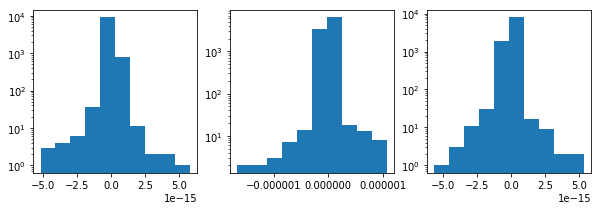

In [7]:
f, axes = plt.subplots(1, 3, figsize=(10, 3))
(ax1, ax2, ax3) = axes
ax1.hist((Osp.dot(Osp.T) - eye).ravel())
ax2.hist((torch.mm(Ot32, Ot32.t()).cpu().numpy() - eye).ravel())
ax3.hist((torch.mm(Ot64, Ot64.t()).cpu().numpy() - eye).ravel())
for ax in axes:
    ax.set_yscale('log')

# Special orthogonal group

In [8]:
%timeit special_ortho_group.rvs(1000)

13.7 s ± 389 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit special_ortho_group_rvs(1000)

532 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit special_ortho_group_rvs(1000, dtype=torch.float64)

6.89 s ± 78.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
SOt32 = ortho_group_rvs(plot_dim)
SOt64 = ortho_group_rvs(plot_dim, dtype=torch.float64)
SOsp = ortho_group.rvs(plot_dim)
eye = np.eye(plot_dim)

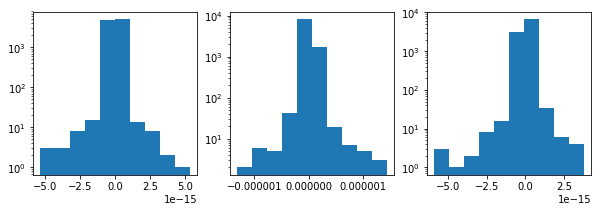

In [12]:
f, axes = plt.subplots(1, 3, figsize=(10, 3))
(ax1, ax2, ax3) = axes
ax1.hist((SOsp.dot(SOsp.T) - eye).ravel())
ax2.hist((torch.mm(SOt32, SOt32.t()).cpu().numpy() - eye).ravel())
ax3.hist((torch.mm(SOt64, SOt64.t()).cpu().numpy() - eye).ravel())
for ax in axes:
    ax.set_yscale('log')